In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
%matplotlib inline

In [2]:
df = pd.read_csv("CarPrice_Assignment.csv")

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.drop(labels=['car_ID','CarName'],axis=1,inplace=True)

In [5]:
df.shape

(205, 24)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17
compressionratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [8]:
df.duplicated().sum()

1

In [9]:
df_quant_cols = df[['symboling','wheelbase','carlength','carwidth','carheight','curbweight',
                  'enginesize','boreratio','stroke','compressionratio','horsepower',
                  'peakrpm','citympg','highwaympg','price']]
df_cat_cols = df.drop(df_quant_cols.columns,axis=1)

print(df_quant_cols.columns, df_cat_cols.columns, sep="\n")

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')
Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object')


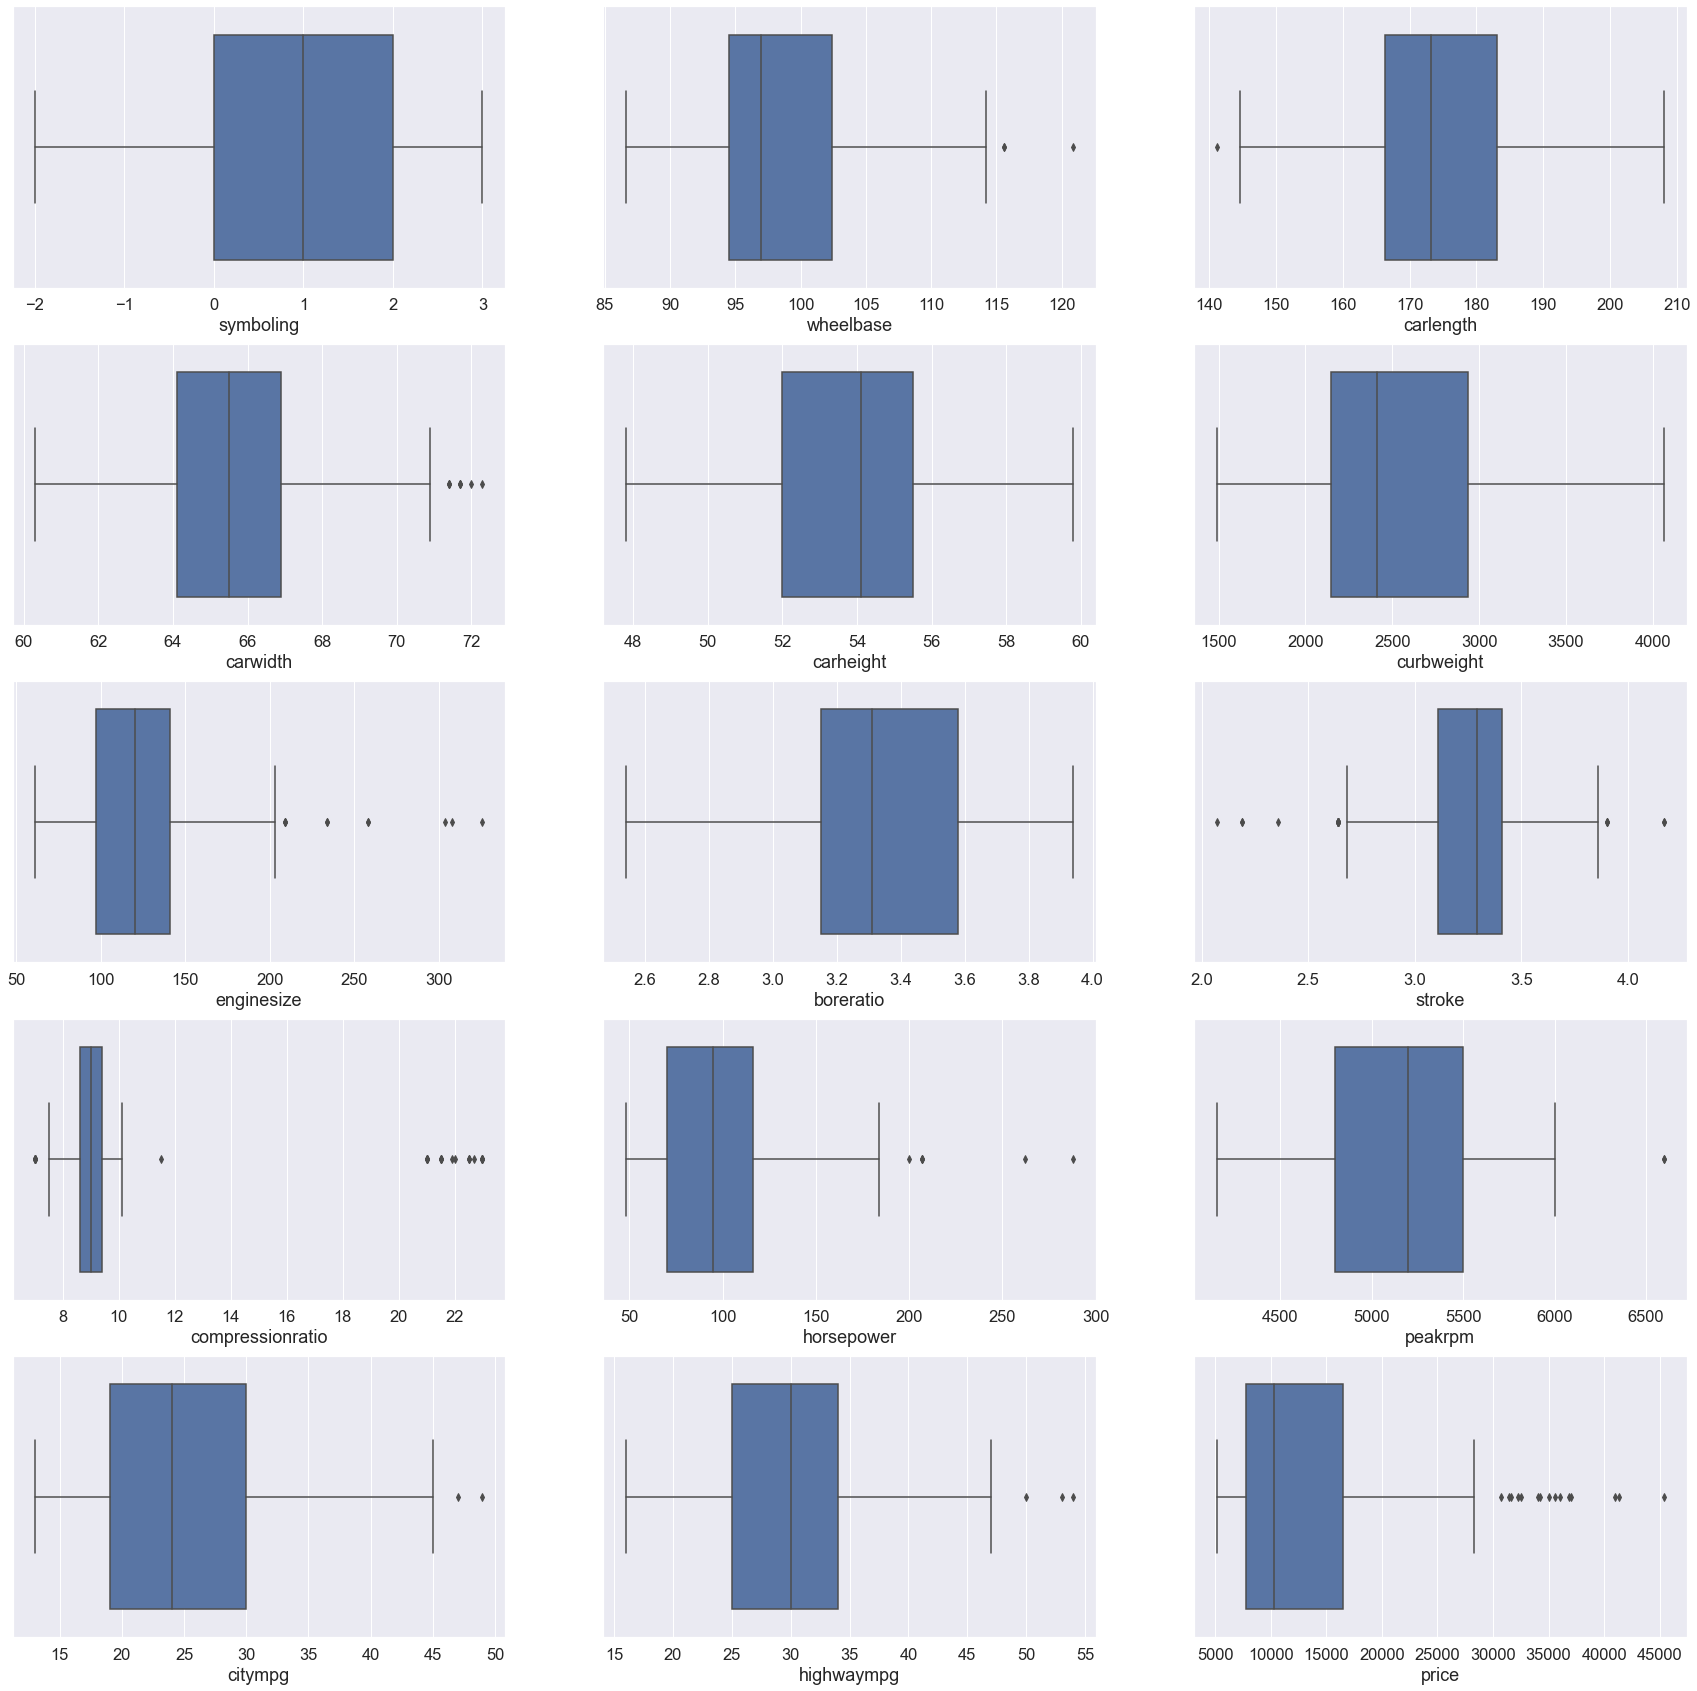

In [10]:
# Analyzing Quantitative variables.
plt.figure(figsize=(30, 30))
sns.set(font_scale=1.5)
ind = 1

for col in df_quant_cols.columns:
    plt.subplot(5, 3, ind)
    sns.boxplot(x=df_quant_cols[col])
    ind += 1

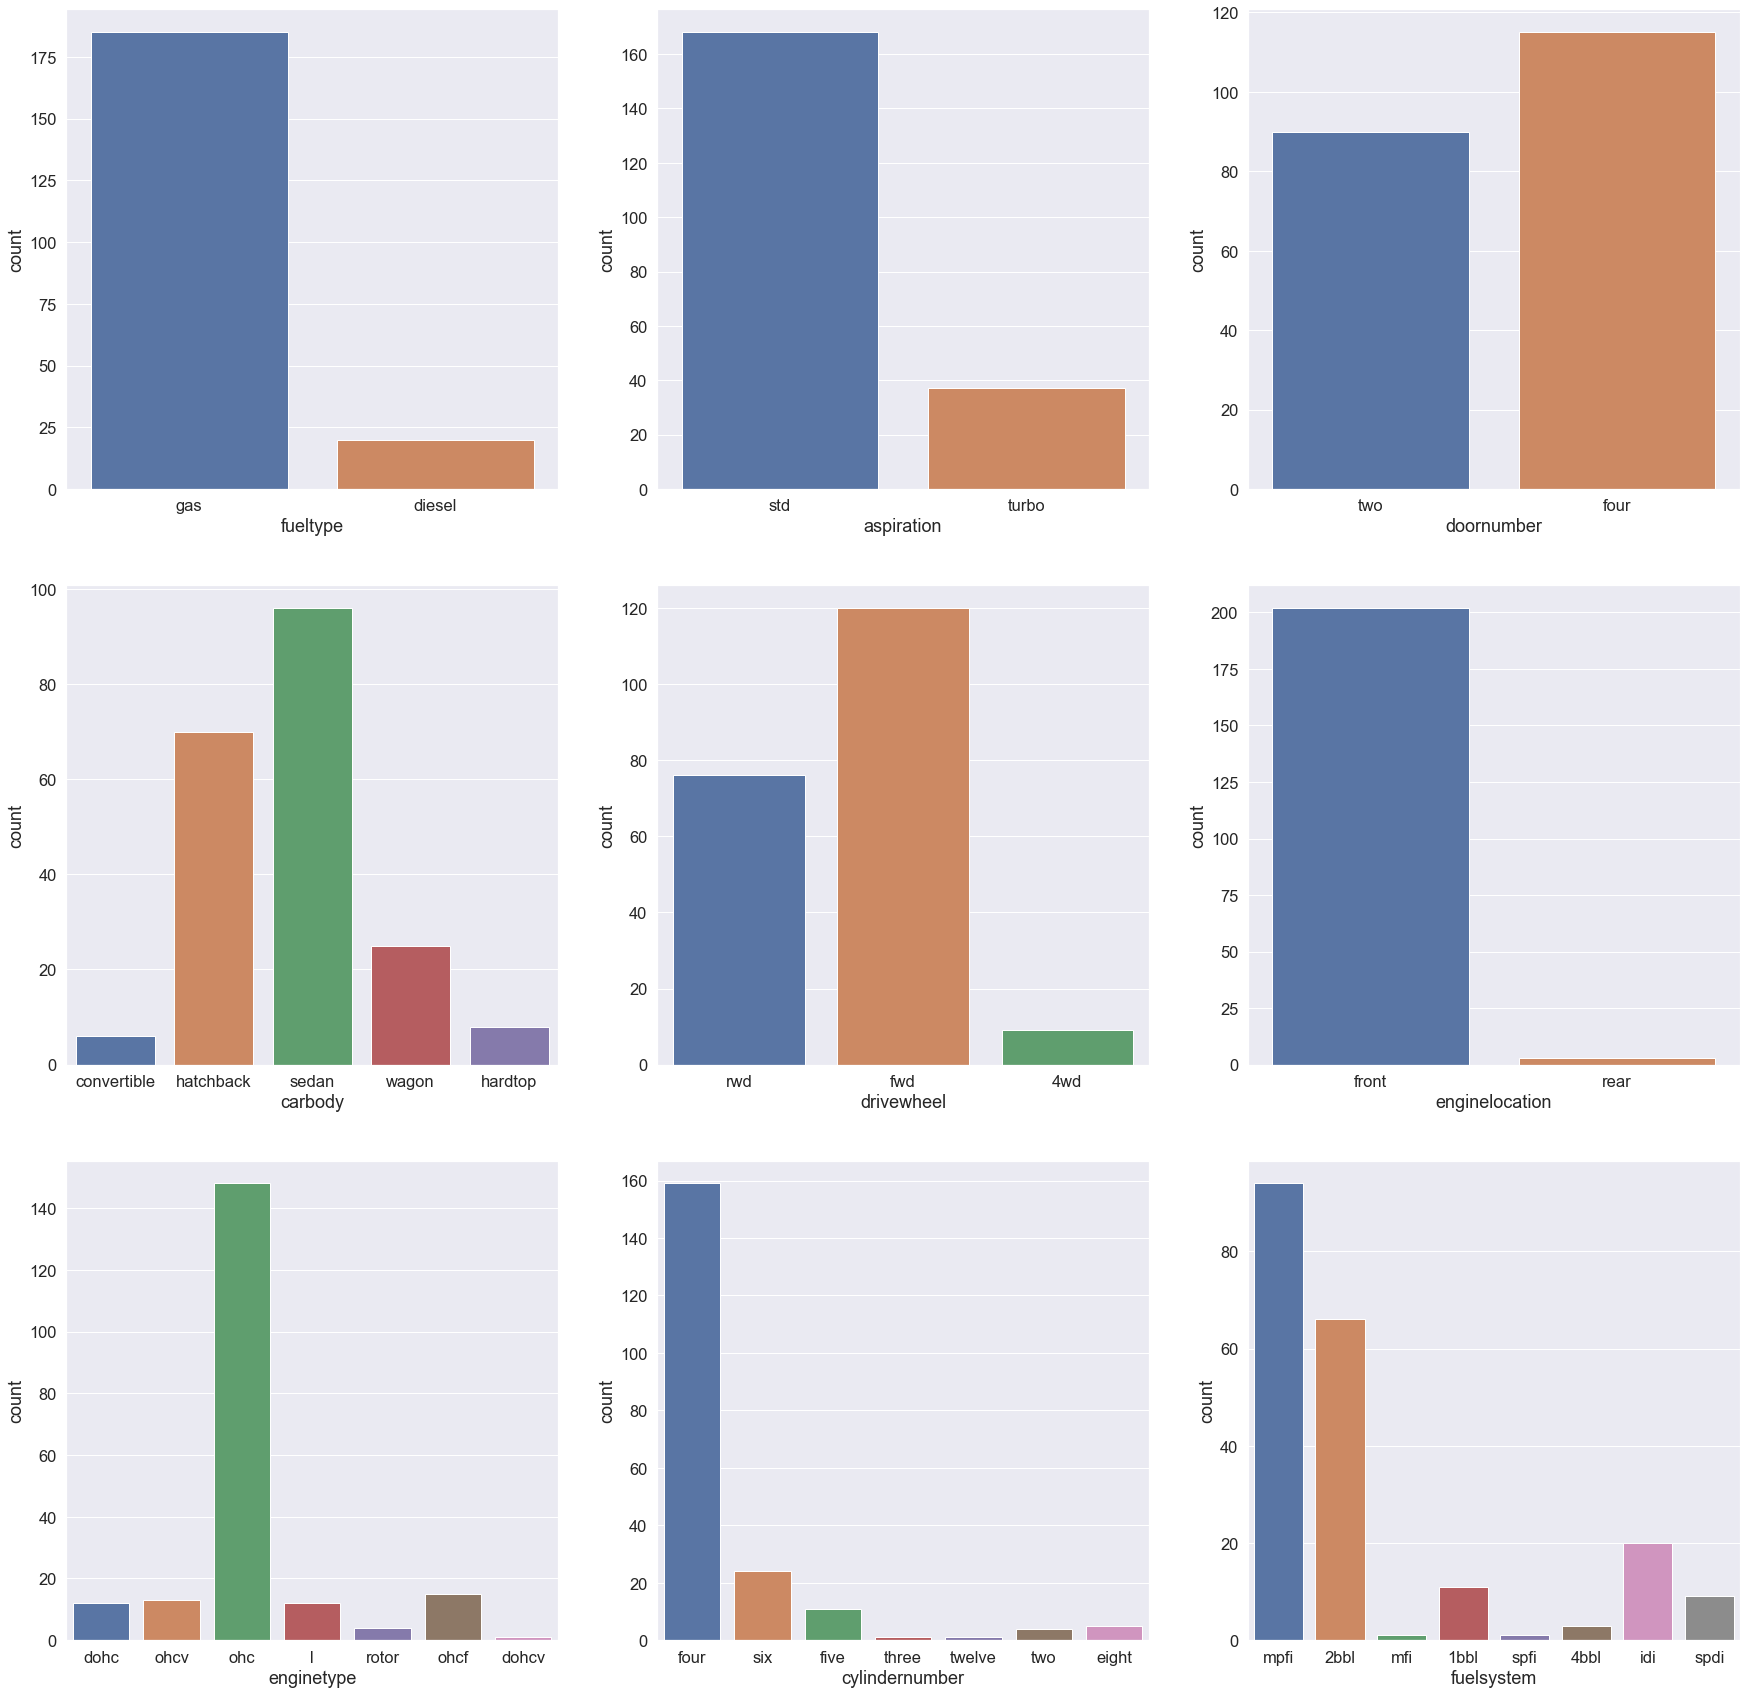

In [11]:
# Analyzing categorical variables.
plt.figure(figsize=(30, 30))
sns.set(font_scale=1.5)
ind = 1

for col in df_cat_cols.columns:
    plt.subplot(3, 3, ind)
    sns.countplot(x=df_cat_cols[col])
    ind += 1
    
sns.set(font_scale=1)

Skew of target variable: 1.7776781560914454


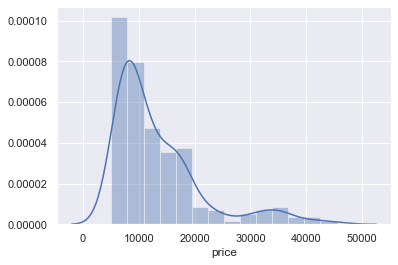

In [12]:
# Checking target variable's distribution.
sns.distplot(df.price)
print("Skew of target variable:",df.price.skew())

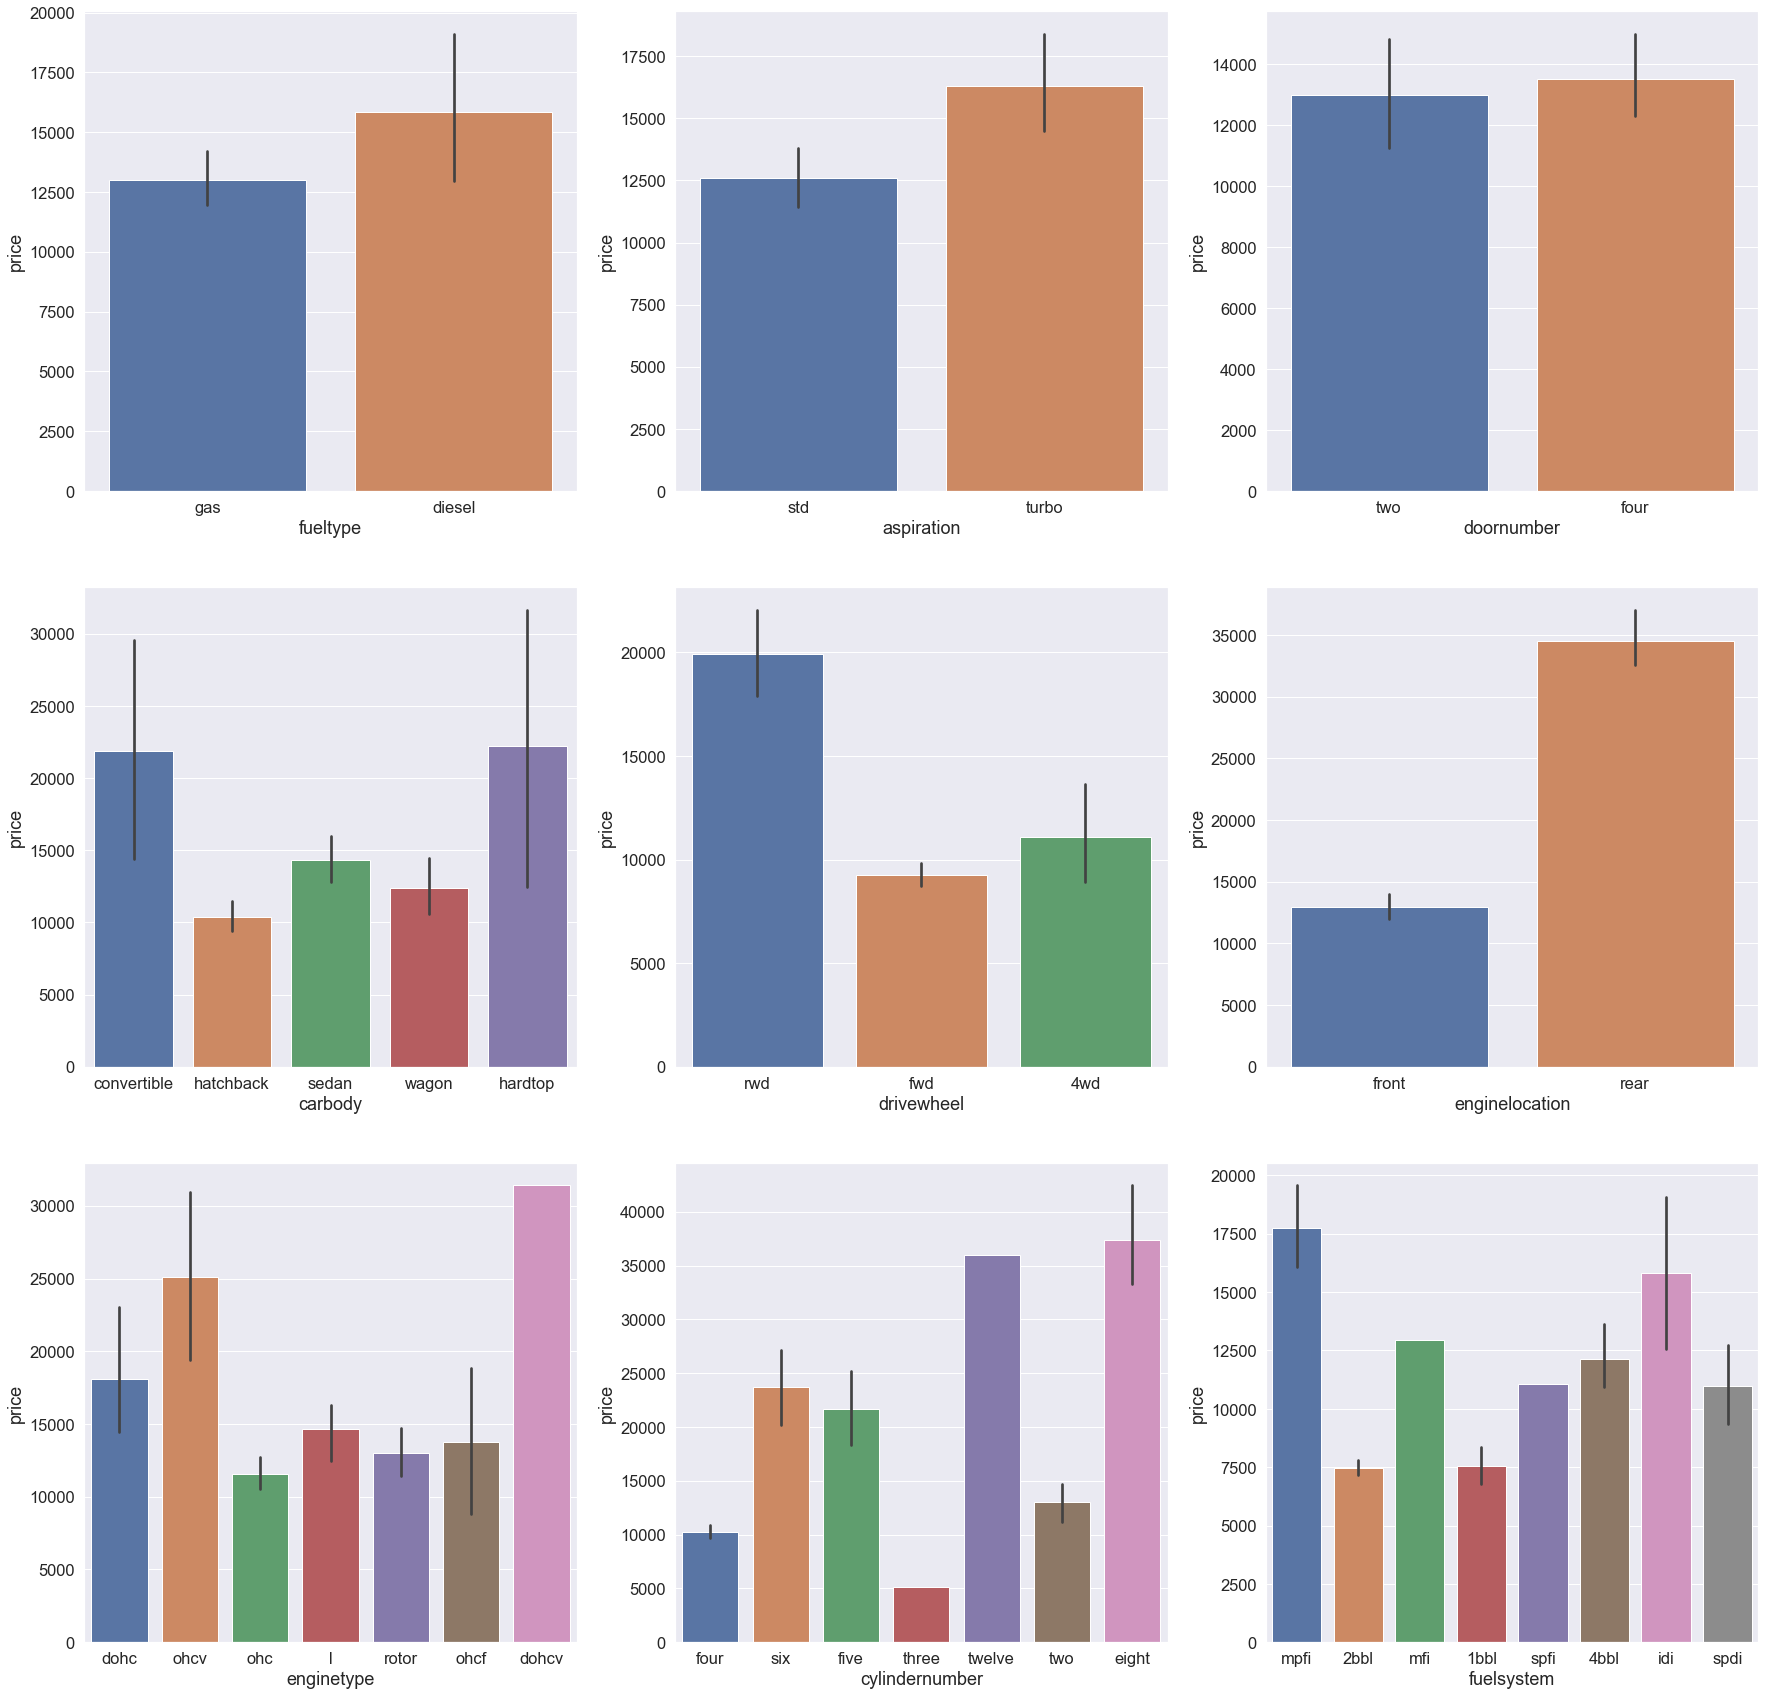

In [13]:
plt.figure(figsize=(30, 30))
sns.set(font_scale=1.5)
ind = 1

for col in df_cat_cols.columns:
    plt.subplot(3, 3, ind)
    sns.barplot(x=df[col], y=df.price)
    ind += 1

sns.set(font_scale=1)

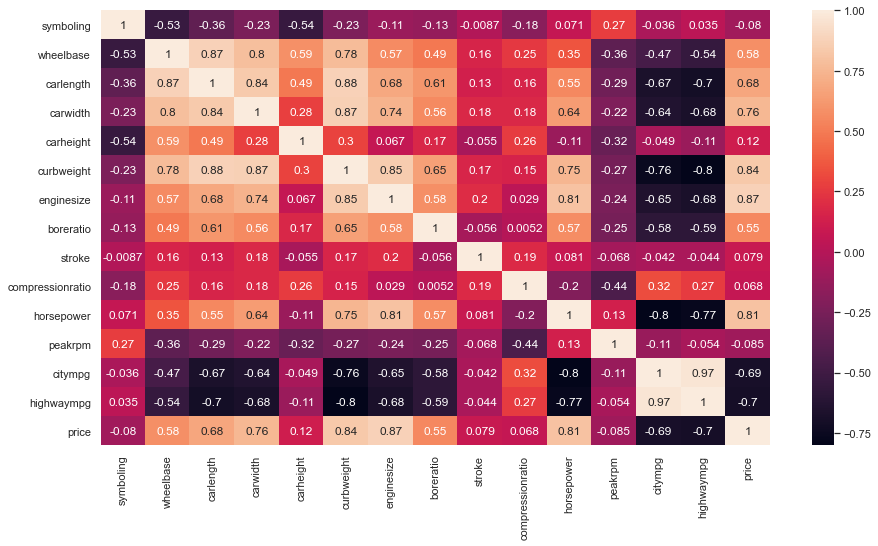

In [14]:
fig,ax = plt.subplots(figsize=(15,8))
sns.heatmap(df_quant_cols.corr(), annot=True)

In [15]:
oe=OrdinalEncoder().fit_transform(df_cat_cols)
oe

array([[1., 0., 1., ..., 0., 2., 5.],
       [1., 0., 1., ..., 0., 2., 5.],
       [1., 0., 1., ..., 5., 3., 5.],
       ...,
       [1., 0., 0., ..., 5., 3., 5.],
       [0., 1., 0., ..., 3., 3., 3.],
       [1., 1., 0., ..., 3., 2., 5.]])

In [16]:
df_cat_cols=pd.DataFrame(data=oe.astype(int),columns=df_cat_cols.columns)

In [17]:
# Joining both Quantitative and Categorical variables.
df_new = df_quant_cols.join(df_cat_cols,how='right')

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = df_new.drop('price',axis=1)
y = df_new.price
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [21]:
reg = LinearRegression()
reg.fit(X_train,y_train)
print("Train Score :", reg.score(X_train,y_train))
print("Test Score :", reg.score(X_test,y_test))

Train Score : 0.9025556520457334
Test Score : 0.7772248095190837


In [22]:
y_pred = reg.predict(X_train)
df_residuals = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred})
df_residuals.insert(2,"ErrorTerm",(df_residuals.Actual - df_residuals.Predicted))

Residual mean : 5.678796186679747e-12


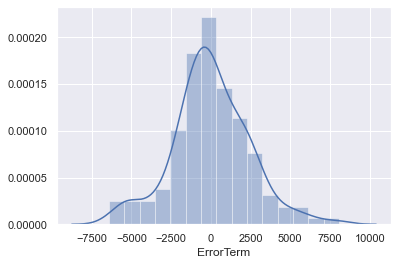

In [23]:
sns.distplot(df_residuals.ErrorTerm)
print("Residual mean :", df_residuals.ErrorTerm.mean())

In [24]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

Mean Absolute Error: 1820.6414608011983
Mean Squared Error: 5849585.546167307
Root Mean Squared Error: 2418.5916451867824


In [25]:
cdf = df[["enginesize","horsepower","price"]]
cdf.head(10)

,enginesize,horsepower,price
0,130,111,13495.000
1,130,111,16500.000
2,152,154,16500.000
3,109,102,13950.000
4,136,115,17450.000
5,136,110,15250.000
6,136,110,17710.000
7,136,110,18920.000
8,131,140,23875.000
9,131,160,17859.167


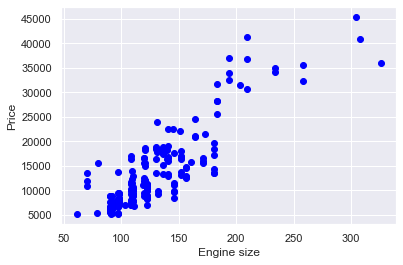

In [26]:
plt.scatter(cdf["enginesize"], cdf["price"],  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Price")
plt.show()

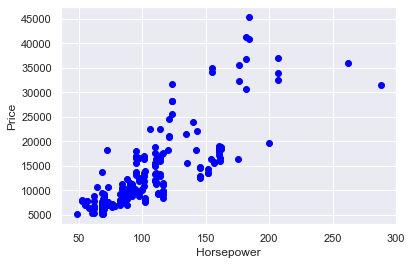

In [27]:
plt.scatter(cdf["horsepower"], cdf["price"],  color='blue')
plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.show() 

In [28]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [29]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

x = np.asanyarray(train[['enginesize','horsepower']])
y = np.asanyarray(train[['price']])
regr.fit (x,y)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[129.57016266  55.82069211]]
Intercept:  [-8977.85290714]


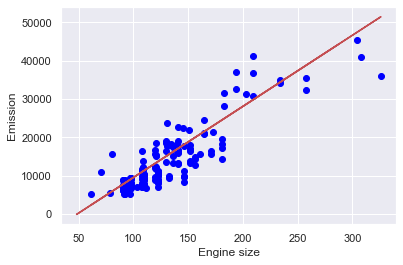

In [30]:
plt.scatter(train["enginesize"], train["price"],  color='blue')
plt.plot(x,regr.coef_[0][0]*x + regr.coef_[0][1]*x + regr.intercept_[0],'-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [32]:
y_hat= regr.predict(test[['enginesize','horsepower']])
x = np.asanyarray(test[['enginesize','horsepower']])
y = np.asanyarray(test[['price']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 18822265.31
Variance score: 0.53


In [33]:
test_car_features = [200,200]
test_car_price = (regr.coef_[0][0]*test_car_features[0] + regr.coef_[0][1]*test_car_features[1] + regr.intercept_[0])
print("Aracın fiyat tahmini: ",int(test_car_price),"$")

Aracın fiyat tahmini:  28100 $


In [34]:
import numpy as np # linear algebra
import pandas as pd #

In [35]:
dataset=pd.read_csv('Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [36]:
X=dataset.iloc[:,1:2].values
y=dataset.iloc[:,2].values 
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [38]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [39]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg2=PolynomialFeatures(degree=2)
X_poly=poly_reg2.fit_transform(X)
lin_reg_2=LinearRegression()
lin_reg_2.fit(X_poly,y)

LinearRegression()

In [40]:
poly_reg3=PolynomialFeatures(degree=3)
X_poly3=poly_reg3.fit_transform(X)
lin_reg_3=LinearRegression()
lin_reg_3.fit(X_poly3,y)

LinearRegression()

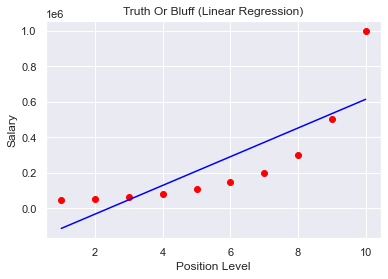

In [41]:
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg.predict(X),color='blue')
plt.title('Truth Or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

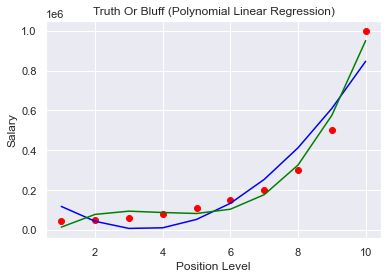

In [42]:
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg_2.predict(poly_reg2.fit_transform(X)),color='blue')
plt.plot(X,lin_reg_3.predict(poly_reg3.fit_transform(X)),color='green')
plt.title('Truth Or Bluff (Polynomial Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

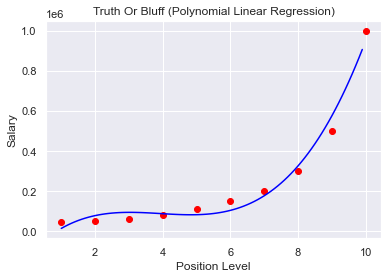

In [43]:
X_grid=np.arange(min(X),max(X),0.1) # This will give us a vector.We will have to convert this into a matrix 
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(X,y,color='red')
plt.plot(X_grid,lin_reg_3.predict(poly_reg3.fit_transform(X_grid)),color='blue')
#plt.plot(X,lin_reg_3.predict(poly_reg3.fit_transform(X)),color='green')
plt.title('Truth Or Bluff (Polynomial Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [44]:
lin_reg.predict([[6.5]])

array([330378.78787879])

In [45]:
lin_reg_2.predict(poly_reg2.fit_transform([[6.5]]))

array([189498.10606061])

In [46]:
lin_reg_3.predict(poly_reg3.fit_transform([[6.5]]))

array([133259.46969697])